# Anomaly Detection Process (by 금융감독원)

1. Data collecting, data preprecessing
2. Dimensionality Reduction
  - Feature Extraction
  - Feature Selection
3. Modeling, Analysis
4. Monitoring


- 실제 사기 탐지는 이런 프레임워크로 진행하고 있고 어떤 방법이 예측을 잘할까
- 요인을 찾자

### reference : Kaggle Kernel

### 1. (1) Data collecting

[Kaggle - Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud)


### 1. (2) Data Preprecessing

#### import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from scipy import stats
import scipy as sp
import statsmodels.api as sm

C:\Users\Yeoni\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
% matplotlib inline

In [3]:
df = pd.read_csv("creditcard.csv")

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


#### Columns 
- Time
- V1~ V28
  - adjusted PCA
  - We don't know what it means (privacy problem)
- Amount
  - how much who pays it once
- class (1: fraud, 0: normal)

#### Rows : 284806

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


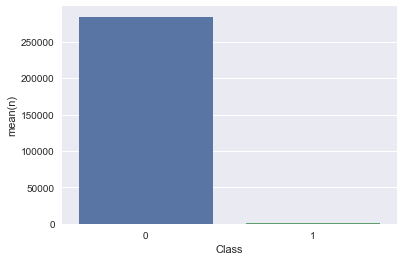

In [8]:
#### Check unbalanced or not

df_balanced = df.groupby('Class')['Class'].agg('count')
df_balanced = pd.DataFrame({'Class': df_balanced.index, 'n': df_balanced.values})
sns.barplot(x = 'Class', y = 'n', data = df_balanced)

In [9]:
tmp = df[['Amount','Class']].copy()
class_0 = tmp.loc[tmp['Class'] == 0]['Amount']
class_1 = tmp.loc[tmp['Class'] == 1]['Amount']
print(class_0.describe())
print("=======================")
print(class_1.describe())

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


- Fraud : 492 times / Normal : 284315 times

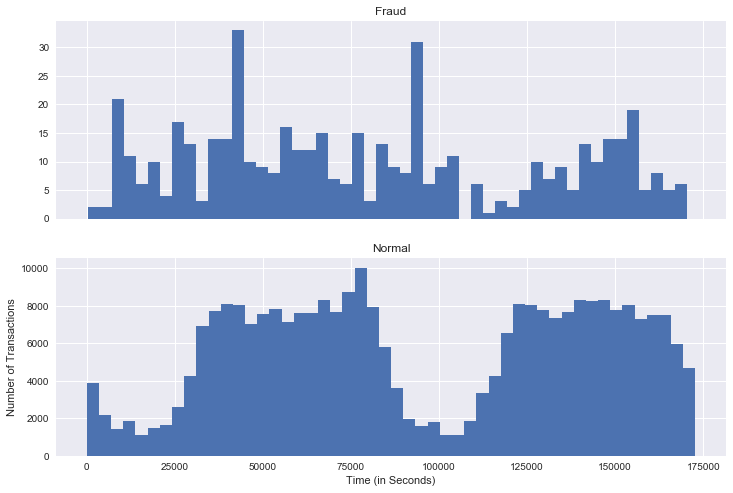

In [10]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,8))

bins = 50

ax1.hist(df.Time[df.Class == 1], bins = bins)
ax1.set_title('Fraud')


ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

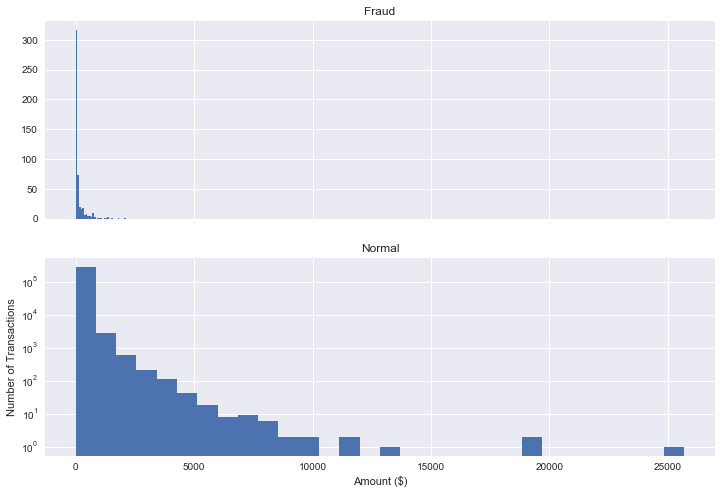

In [11]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,8))

bins = 30

ax1.hist(df.Amount[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Amount[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

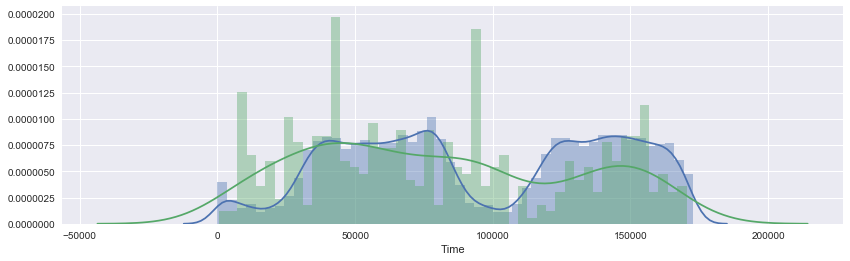

In [12]:
class_0 = df.loc[df['Class'] == 0]["Time"]
class_1 = df.loc[df['Class'] == 1]["Time"]
plt.figure(figsize = (14,4))
sns.set_color_codes("pastel")
sns.distplot(class_0,kde=True,bins=50)
sns.distplot(class_1,kde=True,bins=50)
plt.show()

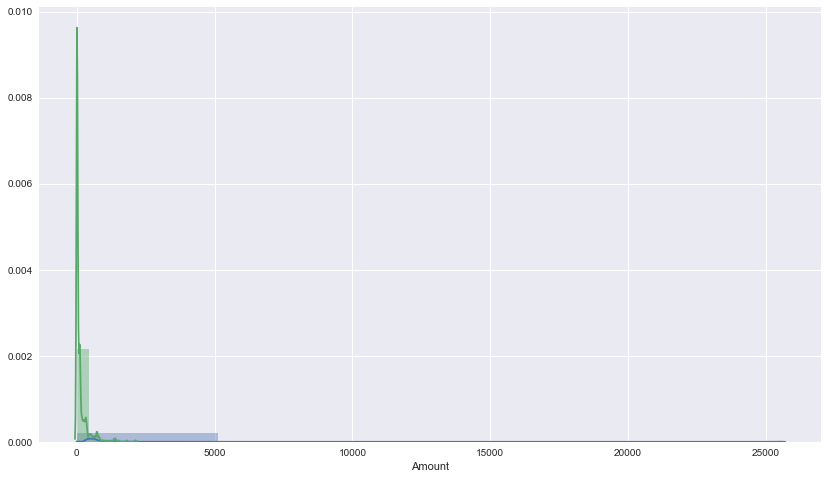

In [13]:
class_0 = df.loc[df['Class'] == 0]["Amount"]
class_1 = df.loc[df['Class'] == 1]["Amount"]
plt.figure(figsize = (14,8))
sns.set_color_codes("pastel")
sns.distplot(class_0,kde=True,bins=5)
sns.distplot(class_1,kde=True,bins=5)
plt.show()

파란선이 정상, 초록색이 이상거래

이상거래가 좀더 빈번히 발생하고 유럽시간 기준으로 100000(밤) 시간대에도 발생

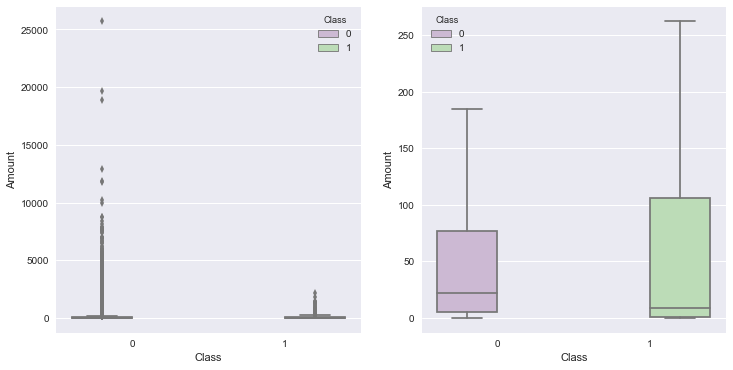

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=False)
plt.show();

상관계수가 높은 변수들이 없어서 (대략 0.6~1.0) 다중공선성 문제는 없을 것으로 보인다.

### 2. Dimensionality Reduction
  - Feature Extraction
  - Feature Selection

### Check Correlation

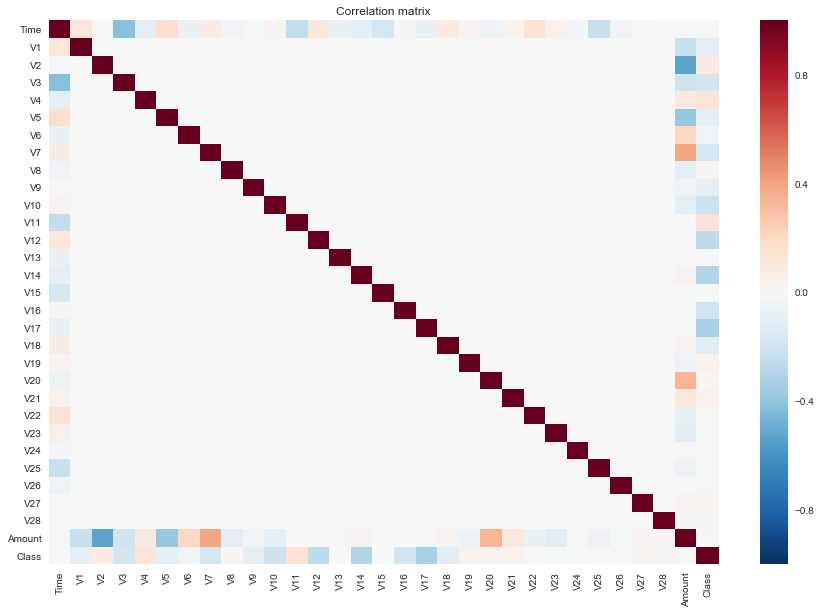

In [15]:
fig = plt.figure(figsize = (15, 10))
corrmat = df.corr()
sns.heatmap(corrmat)
plt.title("Correlation matrix")
plt.show()

In [16]:
corr_stack = corrmat.abs().unstack()
ordered_stack = corr_stack.sort_index(ascending=False)
order_corr = []

for num in range(len(ordered_stack)):
    if ordered_stack[num] > 0.5 and ordered_stack[num] < 1.0:
        order_corr.append(num)
        
print(ordered_stack[order_corr])

V2      Amount    0.531409
Amount  V2        0.531409
dtype: float64


var = df.columns.values

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

### Kullback-Leibler Divergence

~~~
~~~

값이 이미 PCA된 관계로 좋은 결과값 안 나옴.

## 3. Modeling, Analysis

- Classfication
  - Ada boost algorithm, decision trees, CART, RIPPER, Bayesian Belief Network, Neural networks, discriminant analysis, K-nearest neighbor, logistic model, Naïve Bayes
   
   
- Clustering
  - Hidden Markov Model, Self-organizing map
   
- Model Evaluation

### Undersampling

### Training / Test data split

In [34]:
#import xgboost as xgb
from sklearn.metrics import precision_recall_curve


In [5]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn import linear_model
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier
%matplotlib inline
import itertools


In [6]:
X = df.iloc[:,1:30]
y = df["Class"]

In [21]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80
8,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(227845, 29) (227845,)
(56962, 29) (56962,)


### Confusion matrix

In [9]:
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix"',
                          cmap = plt.cm.Blues) :
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [10]:
def show_metrics():
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    print('Precision =     {:.3f}'.format(tp/(tp+fp)))
    print('Recall    =     {:.3f}'.format(tp/(tp+fn)))
    print('F1_score  =     {:.3f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/
                                                 ((tp/(tp+fp))+(tp/(tp+fn))))))

In [11]:
# precision-recall curve
def plot_precision_recall():
    plt.step(recall, precision, color = 'b', alpha = 0.2,
             where = 'post')
    plt.fill_between(recall, precision, step ='post', alpha = 0.2,
                 color = 'b')

    plt.plot(recall, precision, linewidth=2)
    plt.xlim([0.0,1])
    plt.ylim([0.0,1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.show();

In [12]:
def plot_roc():
    plt.plot(fpr, tpr, label = 'ROC curve', linewidth = 2)
    plt.plot([0,1],[0,1], 'k--', linewidth = 2)
    plt.xlim([0.0,0.001])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show();

In [28]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [29]:
print("Score:", model.score(X_test, y_test))

Score: 0.474794038824


- logistic regression

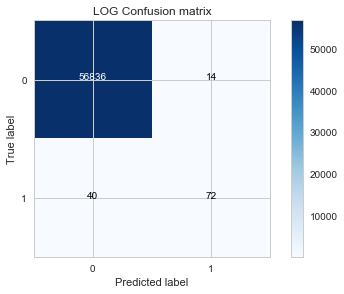

Precision =     0.837
Recall    =     0.643
F1_score  =     0.727


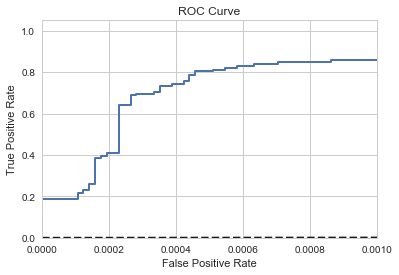

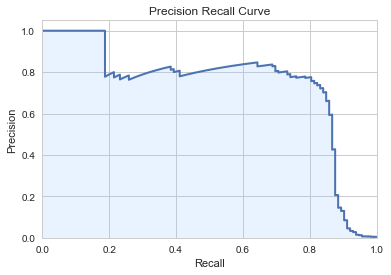

In [30]:
# Logistic regression 
log_cfl = linear_model.LogisticRegression(penalty = 'l1')

log_cfl.fit(X_train, y_train)
y_pred = log_cfl.predict(X_test)
y_score = log_cfl.decision_function(X_test)  

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names, 
                      title = 'LOG Confusion matrix')
plt.show()

show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()

In [8]:
## Crime Type ~ Weapon

result = sm.Logit.from_formula('Class ~ V1+V2+V3+V4+V5+V6+V7+V8+V9+V10+V11+V12+V13+V14+V15+V16+V17+V18+V19+V20+V21+V22+V23+V24+V25+V26+V27+V28+Amount',data = df).fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.003919
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:               284807
Model:                          Logit   Df Residuals:                   284777
Method:                           MLE   Df Model:                           29
Date:                Sat, 16 Jun 2018   Pseudo R-squ.:                  0.6918
Time:                        14:28:36   Log-Likelihood:                -1116.1
converged:                       True   LL-Null:                       -3621.2
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.7304      0.151    -57.654      0.000      -9.027      -8.434
V1             0.0837      0

- random forest

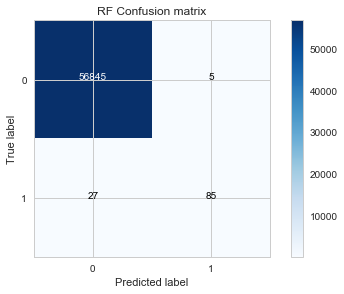

Precision =     0.944
Recall    =     0.759
F1_score  =     0.842


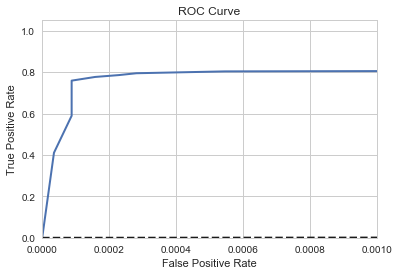

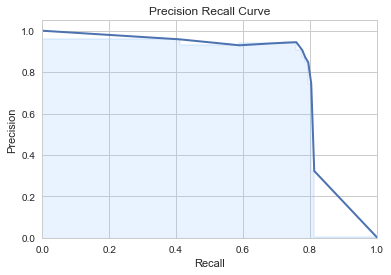

In [31]:
# Ramdom forest Classifier
rf_cfl = RandomForestClassifier(n_jobs = -1,
                                random_state = 42)

rf_result = rf_cfl.fit(X_train, y_train)
y_pred = rf_cfl.predict(X_test)
y_score = rf_cfl.predict_proba(X_test)[:,1]

# Confusion maxtrix
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names, 
                      title = 'RF Confusion matrix')
plt.show()

show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()

1. V1 / feature_n: 16 / importance: 0.26081919237066287
2. V2 / feature_n: 13 / importance: 0.14584195824594573
3. V3 / feature_n: 15 / importance: 0.07590904270677051
4. V4 / feature_n: 11 / importance: 0.06858670463871723
5. V5 / feature_n: 10 / importance: 0.05593934723285714
6. V6 / feature_n: 6 / importance: 0.03617069435072701
7. V7 / feature_n: 17 / importance: 0.03435447580309371
8. V8 / feature_n: 9 / importance: 0.031220467977736872
9. V9 / feature_n: 8 / importance: 0.024655700938076796
10. V10 / feature_n: 5 / importance: 0.023348611923216366
11. V11 / feature_n: 25 / importance: 0.02208723417260348
12. V12 / feature_n: 28 / importance: 0.018299286349806966
13. V13 / feature_n: 7 / importance: 0.017396081787627304
14. V14 / feature_n: 0 / importance: 0.016584199399662894
15. V15 / feature_n: 20 / importance: 0.015930938651712055
16. V16 / feature_n: 18 / importance: 0.015584949823502276
17. V17 / feature_n: 2 / importance: 0.01458805857460683
18. V18 / feature_n: 3 / import

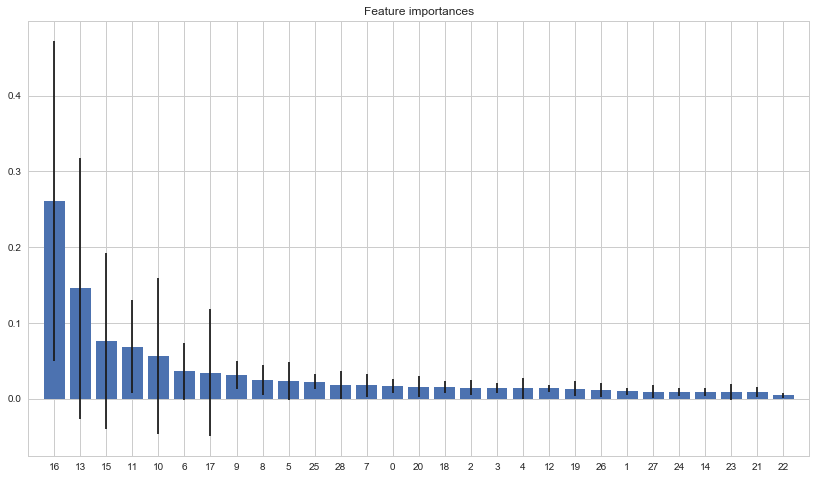

In [32]:
importances = rf_result.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X.shape[1]):
    print("{}. {} / feature_n: {} / importance: {}".format(f+1, list(X.columns)[f], indices[f], importances[indices[f]]))

std = np.std([tree.feature_importances_ for tree in rf_result.estimators_],
             axis=0)

plt.figure(figsize=(14,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()



In [41]:
def rf_fit():
    rf = RandomForestClassifier(max_features=None, random_state=0)
    rf_result = rf.fit(X_train, y_train)

    importances = rf_result.feature_importances_
    indices = np.argsort(importances)[::-1]

    for f in range(X.shape[1]):
        print("{}. {} / feature_n: {} / importance: {}".format(f+1, list(X.columns)[f], indices[f], importances[indices[f]]))

    std = np.std([tree.feature_importances_ for tree in rf_result.estimators_],
                 axis=0)

    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
           yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    plt.show()

1. V1 / feature_n: 16 / importance: 0.5369733538335902
2. V2 / feature_n: 13 / importance: 0.11626683592063905
3. V3 / feature_n: 9 / importance: 0.04951248609521853
4. V4 / feature_n: 11 / importance: 0.04291260421756338
5. V5 / feature_n: 26 / importance: 0.02640512316923576
6. V6 / feature_n: 25 / importance: 0.022296011230980253
7. V7 / feature_n: 20 / importance: 0.02011890575074497
8. V8 / feature_n: 3 / importance: 0.017677263305139367
9. V9 / feature_n: 28 / importance: 0.01399575930197344
10. V10 / feature_n: 6 / importance: 0.013670399260948393
11. V11 / feature_n: 12 / importance: 0.012954932841364855
12. V12 / feature_n: 18 / importance: 0.012019239915428106
13. V13 / feature_n: 15 / importance: 0.011702730440562746
14. V14 / feature_n: 21 / importance: 0.009365340982916446
15. V15 / feature_n: 23 / importance: 0.009305313278408578
16. V16 / feature_n: 14 / importance: 0.009296628330002912
17. V17 / feature_n: 19 / importance: 0.00923971991951728
18. V18 / feature_n: 7 / im

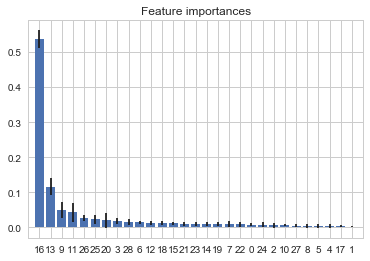

In [34]:
rf_fit()

- XGBoost

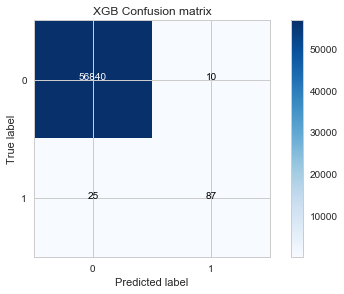

Precision =     0.897
Recall    =     0.777
F1_score  =     0.833


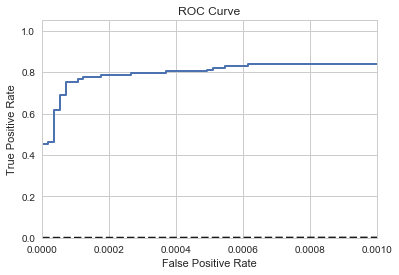

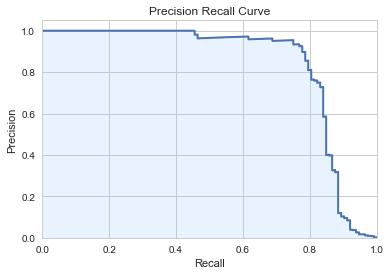

In [35]:
# xgb
xgb_cfl = xgb.XGBClassifier(n_jobs = -1)

xgb_cfl.fit(X_train, y_train)
y_pred = xgb_cfl.predict(X_test)
y_score = xgb_cfl.predict_proba(X_test)[:,1]

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes=class_names, 
                      title='XGB Confusion matrix')
plt.show()

show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()




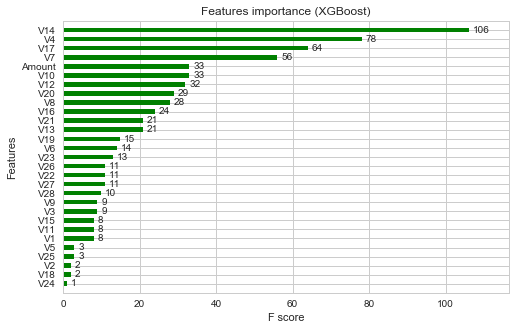

In [36]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
xgb.plot_importance(xgb_cfl, height=0.5, title="Features importance (XGBoost)", ax=ax, color="green") 
plt.show()

In [ ]:
from sklearn.neural_network import MLPClassifier

In [18]:
from sklearn.metrics import confusion_matrix

Iteration 1, loss = 0.38093485
Iteration 2, loss = 0.03849319
Iteration 3, loss = 0.01757598
Iteration 4, loss = 0.00770323
Iteration 5, loss = 0.00494279
Iteration 6, loss = 0.00403603
Iteration 7, loss = 0.00373431
Iteration 8, loss = 0.00354227
Iteration 9, loss = 0.00336834
Iteration 10, loss = 0.00336806
Iteration 11, loss = 0.00312803
Iteration 12, loss = 0.00304425
Iteration 13, loss = 0.00309298
Iteration 14, loss = 0.00302892
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


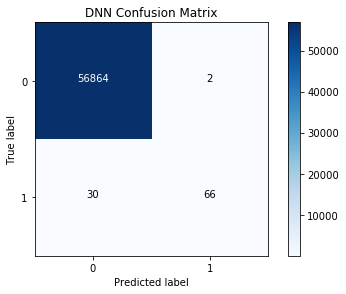

Precision =     0.971
Recall    =     0.688
F1_score  =     0.805


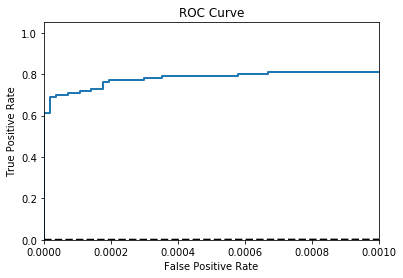

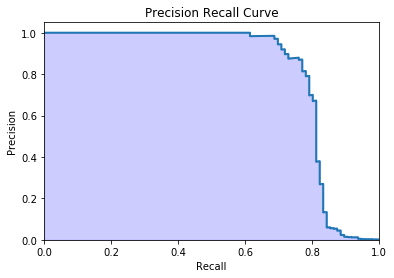

In [36]:
mlp  =  MLPClassifier(activation = 'relu', hidden_layer_sizes = (84,42,42,30,30),
                    solver="adam",
                    learning_rate_init = 0.00003, 
                    max_iter = 500, verbose = 1)
mlp.fit(X_train, y_train)


y_pred = mlp.predict(X_test)
y_score = mlp.predict_proba(X_test)[:,1]   #cross-entropy

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names, 
                      title = 'DNN Confusion Matrix')
plt.show()

show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()

In [28]:
print("Training set score: Tr|ain %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Training set score: Tr|ain 0.999539
Test set score: 0.999438
